In [ ]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print(len(train_data), len(test_data))
print(train_data[10])
print(train_labels)

8982 2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
[ 3  4  3 ... 25  3 25]


In [ ]:

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1.
  return results

In [ ]:

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i,label in enumerate(labels):
    results[i,label]=1
  return results

In [ ]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [ ]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.5640 - accuracy: 0.4922 - val_loss: 1.7167 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.3905 - accuracy: 0.7136 - val_loss: 1.3001 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0194 - accuracy: 0.7885 - val_loss: 1.1224 - val_accuracy: 0.7670
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.7978 - accuracy: 0.8379 - val_loss: 1.0287 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 1s 62ms/step - loss: 0.6333 - accuracy: 0.8697 - val_loss: 0.9812 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5050 - accuracy: 0.8998 - val_loss: 0.9950 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4109 - accuracy: 0.9147 - val_loss: 0.9061 - val_accuracy: 0.8210
Epoch 8/20
16

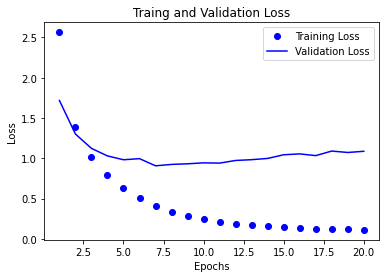

In [ ]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt,plt.title('Traing and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
results=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 78ms/step - loss: 2.5541 - accuracy: 0.5412 - val_loss: 1.6718 - val_accuracy: 0.6560
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.3821 - accuracy: 0.7151 - val_loss: 1.2982 - val_accuracy: 0.7230
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.0356 - accuracy: 0.7775 - val_loss: 1.1271 - val_accuracy: 0.7710
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8217 - accuracy: 0.8289 - val_loss: 1.0539 - val_accuracy: 0.7830
Epoch 5/9
16/16 [==============================] - 1s 47ms/step - loss: 0.6558 - accuracy: 0.8614 - val_loss: 0.9599 - val_accuracy: 0.8030
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.5283 - accuracy: 0.8867 - val_loss: 0.9274 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 49ms/step - loss: 0.4230 - accuracy: 0.9109 - val_loss: 0.9088 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===